In [1]:
import editdistance
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np

In [40]:
with open("../data/ES/ES3_R1_spacers.txt") as f:
    lines_1 = [x[:31] for x in f.readlines()[1:]]
with open("../data/ES/ES3_R2_spacers.txt") as f:
    lines_2 = [x[:31] for x in f.readlines()[1:]]


In [41]:
lines = lines_1 + lines_2

In [42]:
from collections import Counter

In [43]:
counter = Counter(lines)

In [44]:
def get_vals_keys_sorted(counter):
    items = counter.items()
    keys = []
    vals = []
    for k,v in items:
        #print(k, v)
        keys.append(k)
        vals.append(v)
        
    arg_sort = np.argsort(vals)[::-1]
    keys = np.array(keys)[arg_sort]
    vals = np.array(vals)[arg_sort]
    
    return keys, vals

In [45]:
keys, vals = get_vals_keys_sorted(counter)

In [46]:
vals

array([65524, 49188, 33336, ...,     1,     1,     1])

In [47]:
65000 * 0.002

130.0

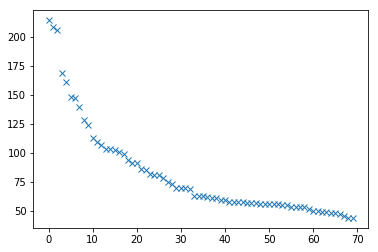

In [48]:
plt.plot(vals[30:100],linestyle='None',marker = "x")
plt.show()

### Select correct

In [50]:
mask = vals > 120

In [52]:
mask.sum()

40

In [51]:
clusters = keys[mask]

In [54]:
lines = np.array(lines)

In [55]:
for i in tqdm(range(lines.shape[0])):
    for c in clusters:
        if editdistance.eval(c, lines[i]) < 8:
            lines[i] = c
        

100%|██████████| 333870/333870 [00:53<00:00, 6216.53it/s]


In [56]:
counter2 = Counter(lines)

### Select 1

In [15]:
clusters = keys[:18]

In [17]:
lines = np.array(lines)

In [18]:
lines.shape[0]

333870

In [19]:
for i in tqdm(range(lines.shape[0])):
    for c in clusters:
        if editdistance.eval(c, lines[i]) < 8:
            lines[i] = c
        

100%|██████████| 333870/333870 [00:25<00:00, 13294.73it/s]


In [21]:
counter2

Counter({'AACATCGGAAACGGCTTCGGGGCGGCGT\n': 2,
         'AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG': 9929,
         'AACGTGTTCGGCATCACCTTTGGCTTCGGCT': 1,
         'AACTGGATTCTGCTCTAATTATTACATCATC': 1,
         'AAGCCGGCTGGCAATCTCTTTCGGGGTGAGT': 1,
         'AAGCTGGCGGGCACTCTCTTTCGGGGTGAGT': 1,
         'AAGCTGGCTGGCAAACTCTTTCGGGGTGAGT': 1,
         'AAGCTGGCTGGCAATCACTTTCGGGGTGAGT': 1,
         'AAGCTGGCTGGCAATCCCTTTCGGGGTGAGT': 1,
         'AAGCTGGCTGGCAATCTCCTTCGGGGTGAGT': 1,
         'AAGCTGGCTGGCAATCTCTTCCGGGGTGAGT': 1,
         'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGT': 301,
         'AAGCTGGCTGGCAATCTCTTTCGTGGTGAGT': 1,
         'AAGTTCGACAACTAAAAAAATGATAACAAGT': 1,
         'AAGTTCGACAACTTAAAAAATGATAACAAGT': 16,
         'AATTGGTGTGAGATGCATCTCTTCCTCACCC': 2,
         'ACACCCCCCTAACACCAATACGCCCACGCCG': 1,
         'ACACGCCCTTATCAAATACACAATAGATT\n': 2,
         'ACACGCCCTTATCAAATAGCTGTGATTTACC': 51643,
         'ACACGCCCTTATCAAATTCACAATAGATT\n': 3,
         'ACACGCCCTTATCACCATAAAGAAACTATTT': 1,
    

In [22]:
keys_2, vals_2 = get_vals_keys_sorted(counter2)

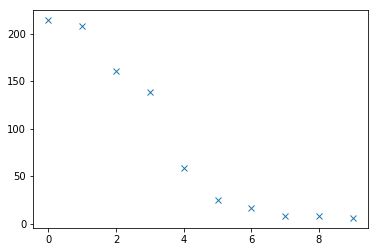

In [23]:
plt.plot(vals_2[30:40],linestyle='None',marker = "x")
plt.show()

In [32]:
keys_2[30:40]

array(['TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCA',
       'GCGACCGCTCAGAAATTCCAGACCCGATCCA',
       'TCAACATTATCAATTACAACCGACAGGGAGC',
       'AGCGTGTTCGGCATCACCTTTGGCTTCGGCT',
       'GGCAATAGCGAACAACAAGGTCGGTTGTTTG',
       'TGCGTGAGCGTATCGCCGCGCGTCTGCGAAA',
       'AAGTTCGACAACTTAAAAAATGATAACAAGT',
       'CATCGGCAATATGGTATTTCTCGATCATTTT',
       'TGGATGTATTGAGCCAATTACTGAATCTCGG', 'CTGTTTTCGCAAATCTATGGACTATTGCTAC'],
      dtype='<U31')

In [38]:
TACCGTACAGACTGCCGGATATTATTTTTTG
GACAGAACGGCCTCAGTAGCCTCGTCAGGCT

NameError: name 'TACCGTACAGACTGCCGGATATTATTTTTTG' is not defined

In [39]:
keys[0:40]

array(['GACAGAACGGCCTCAGTAGTCTCGTCAGGCT',
       'ACACGCCCTTATCAAATAGCTGTGATTTACC',
       'CAAGTGATATCCATCATCGCATCCAGTGCGC',
       'AGTGCTGGACCATTTCAAATTCACAATAGAT',
       'ATAGACCCCGAACAACAATACGCGCAAACCG',
       'GGAATGATATTTCAATAAATAATTATAACAA',
       'TACCGTACAGACTGCCGGATATTATTTTTTT',
       'TATAGAGATCGTTTTTGGAATTTACAGCGAG',
       'CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA',
       'CCCTCACACCGATTCGCCAAACGGTGGAGAA',
       'AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG',
       'AGCTGGGCGAAATTTTGATTCATCGTGATGA',
       'TGCATGGCTTTGGCTTCCTCTTTGACGGACG',
       'CCGTAAGTGGTTTGAGCGATGATATTTGTGC',
       'ATATATCAGAGCAAAAAACAAAGCCACAGCC',
       'TTTTACAGTGTCAACAATCGTTCCCTGATTG',
       'CATAAAGAAACTATTTTGCGTTTCGTTCAGG',
       'CCGCCGTTGGCACCGTCAAACTCCGGTACTG',
       'TCGGTTCAGGCGTTGCAAACCTGGCTACCGG',
       'GTAGTCCATCATTCCACCTATGTCTGAACTC',
       'CTGTTTTCGCAAATCTATGGACTATTGCTAT',
       'GGGCGCACGGAATACAAAGCCGTGTATCTGC',
       'CAGCGTCAGGCGTGAAATCTCACCGTCGTTG',
       'GAAATGCTGGTGAGCGTTAATGCCGC

### Select 2

In [76]:
mask = vals_2 > 100

In [102]:
mask.sum()

34

In [80]:
clusters_2 = keys_2[mask]

In [64]:
c_to_n = {}

for i, c in enumerate(clusters):
    c_to_n[c] = i

### Pairs

In [60]:
with open("../data/ES/ES3_R1_pairs.txt") as f:
    pairs_1 = [x[:-2] for x in f.readlines()[1:]]
with open("../data/ES/ES3_R2_pairs.txt") as f:
    pairs_2 = [x[:-2] for x in f.readlines()[1:]]

In [61]:
pairs = pairs_1 + pairs_2

In [62]:
pairs

['GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC ACACGCCCTTATCAAATAGCTGTGATTTACCT',
 'ACACGCCCTTATCAAATAGCTGTGATTTACCTA ACACGCCCTTATCAAATAGCTGTGATTTACCT',
 'TGCCGTACAGACTGCCGGATATTATTTTTTTG CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA',
 'TATAGAGATCGTTTTTGGAATTTACAGCGAGG CCGTAAGTGGTTTGAGCGATGATATTTGTGC',
 'CAAGTGATATCCATCATCGCATCCAGTGCGCC AGTGCTGGACCATTTCAAATTCACAATAGAT',
 'ATATATCAGAGCAAAAAACAAAGCCACAGCCA ACACGCCCTTATCAAATAGCTGTGATTTACCT',
 'CCCTCACACCGATTCGCCAAACGGTGGAGAAG AGCTGGGCGAAATTTTGATTCATCGTGATGA',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC ACACGCCCTTATCAAATAGCTGTGATTTACCT',
 'ACACGCCCTTATCAAATAGCTGTGATTTACCTA ATAGACCCCGAACAACAATACGCGCAAACCG',
 'GGAATGATATTTCAATAAATAATTATAACAAT CCCTCACACCGATTCGCCAAACGGTGGAGAA',
 'TGCATGGCTTTGGCTTCCTCTTTGACGGACGC ATATATCAGAGCAAAAAACAAAGCCACAGCC',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC ACACGCCCTTATCAAATAGCTGTGATTTACCT',
 'ATATATCAGAGCAAAAAACAAAGCCACAGCCA CATAAAGAAACTATTTTGCGTTTCGTTCAGG',
 'CAAGTGATATCCATCATCGCATCCAGTGCGCC AGTGCTGGACCATTTCAAATTCACAATAGAT',
 'AGTGCTGGACCATTTCAAATTCACA

In [65]:
X = np.zeros((len(pairs), 2))

In [66]:
def closest(sp, c_to_n):
    min_d = 100
    ans = -1
    for k, v in c_to_n.items():
        if editdistance.eval(k, sp) < min_d:
            min_d = editdistance.eval(k, sp)
            ans = v
    return ans

In [67]:
bad = 0
for i, p in tqdm(enumerate(pairs[:])):
    p1, p2 = p.split(" ")
    #print(p1, p2)
    cl_1 = closest(p1[:31], c_to_n)
    cl_2 = closest(p2[:31], c_to_n)
    if cl_1 != -1:
        X[i][0] = cl_1
    else:
        bad += 1
    if cl_2 != -1:
        X[i][1] = cl_2
    else:
        bad += 1

109822it [00:18, 6001.47it/s]


In [68]:
bad

0

### Clusters

In [69]:
import networkx as nx

In [70]:
def to_graph(gr, clusters_num, edges_num):
    G=nx.Graph()
    G.add_nodes_from(np.arange(clusters_num))
    
    edges = []
    curr_weight = 1000
    #while curr_weight > 100:
    for i in range(edges_num):
        lin_max = np.argmax(gr)
        curr_weight = np.max(gr)
        
        x, y = lin_max // gr.shape[0], lin_max % gr.shape[0]
        gr[x, :] = 0
        gr[:, x] = 0

        G.add_edge(x, y)
        edges.append([x, y])
    
    #arr_to_sp(sp_9)
    return edges, G

100%|██████████| 109822/109822 [00:00<00:00, 583463.40it/s]


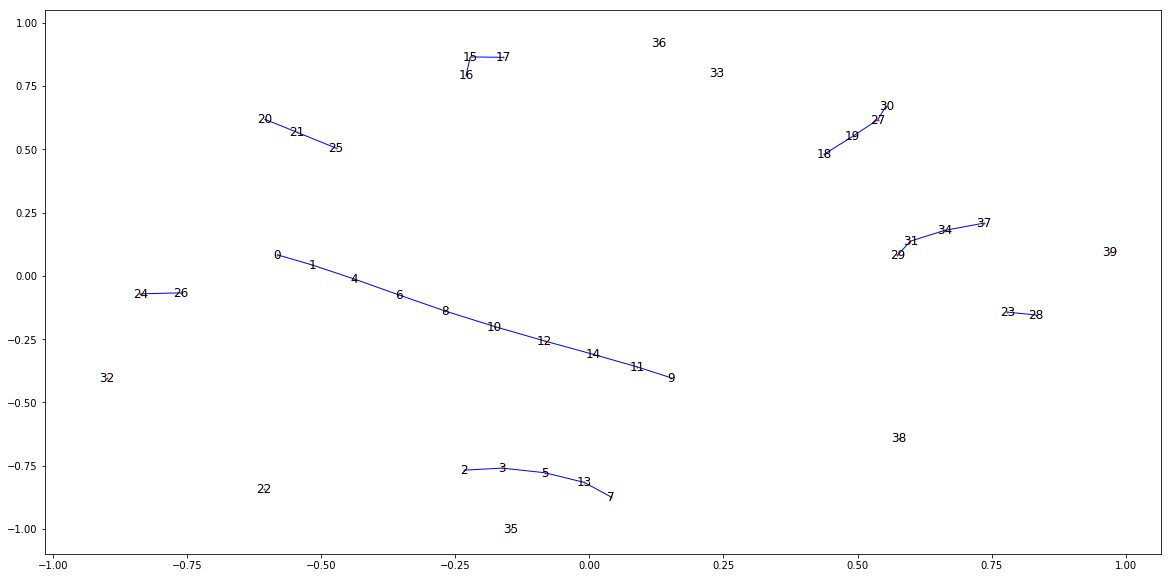

In [77]:
graph = np.zeros((40,40)).astype(int)

for p in tqdm(X.astype(int)):
    graph[p[0]][p[1]] += 1

pairs, G = to_graph(graph, 40, 25)

fig, ax = plt.subplots(figsize=(20, 10))
nx.draw_networkx(G, edge_color='b', node_size=1)
#nx.draw_networkx(G_ans, edge_color='r', node_size=1)
#nx.draw_networkx_edges(G, )
plt.show()

In [79]:
ans_c = []
for sp in ans:
    ans_c.append(closest(sp, c_to_n))

In [80]:
print(ans_c)

[22, 18, 19, 27, 30, 24, 26, 29, 31, 34, 37, 8, 0, 20, 21, 25, 23, 28, 0, 1, 4, 6, 8, 10, 12, 14, 16, 15, 17, 7, 13, 3, 5, 9, 11]


In [78]:
ans = ['CAGCGTCAGGCGTGAAATCTCACCGTCGTTG',
 'TCGGTTCAGGCGTTGCAAACCTGGCTACCGG',
 'GTAGTCCATCATTCCACCTATGTCTGAACTC',
 'CCGGGGGATAATGTTTACGGTCATGCGCCCC',
 'TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCA',
 'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGT',
 'TAGTTTCCGTATCTCCGGATTTATAAAGCTG',
 'GCAGGCGGCGACGCGCAGGGTATGCGCGATT',
 'GCGACCGCTCAGAAATTCCAGACCCGATCCA',
 'TCAACATTATCAATTACAACCGACAGGGAGC',
 'AGCGTGTTCGGCATCACCTTTGGCTTCGGCT',
 'TGCGTGAGCGTATCGCCGCGCGTCTGCGAAA',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCT',
 'CTGTTTTCGCAAATCTATGGACTATTGCTAT',
 'GGGCGCACGGAATACAAAGCCGTGTATCTGC',
 'TGGCTCTGCAACAGCAGCACCCATGACCACG',
 'GAAATGCTGGTGAGCGTTAATGCCGCAAACA',
 'ATTACGCCTTTTTGCGATTGCCCGGTTTTTG',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCT',
 'ACACGCCCTTATCAAATAGCTGTGATTTACC',
 'ATAGACCCCGAACAACAATACGCGCAAACCG',
 'TACCGTACAGACTGCCGGATATTATTTTTTT',
 'CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA',
 'AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG',
 'TGCATGGCTTTGGCTTCCTCTTTGACGGACG',
 'ATATATCAGAGCAAAAAACAAAGCCACAGCC',
 'CATAAAGAAACTATTTTGCGTTTCGTTCAGG',
 'TTTTACAGTGTCAACAATCGTTCCCTGATTG',
 'CCGCCGTTGGCACCGTCAAACTCCGGTACTG',
 'TATAGAGATCGTTTTTGGAATTTACAGCGAG',
 'CCGTAAGTGGTTTGAGCGATGATATTTGTGC',
 'AGTGCTGGACCATTTCAAATTCACAATAGAT',
 'GGAATGATATTTCAATAAATAATTATAACAA',
 'CCCTCACACCGATTCGCCAAACGGTGGAGAA',
 'AGCTGGGCGAAATTTTGATTCATCGTGATGA']

In [148]:
c = 0
for sp in clusters_2:
    if sp in ans:
        c+=1

In [149]:
c

33